In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import io


Saving Iris.csv to Iris.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']), index_col = 'Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data_new = data.iloc[:,[0,1,2,3]]
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


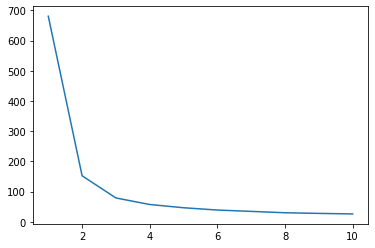

In [ ]:
#Now we will generate clusters and check which one is better for our data
alpha = list()
for i in range(1,11):
  model = KMeans(n_clusters=i , random_state= 30)
  model.fit(data_new.values)
  alpha.append(model.inertia_)

#Visualize the Elbow
plt.plot(range(1,11),  alpha)
plt.show()
#We can visualise the elbow from the graph

In [ ]:
#We will use three as no of clusters
model = KMeans(n_clusters=3, max_iter= 400,random_state= 30)
model_f = model.fit_predict(data_new.values)
#Now model has been trained by the data
model_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

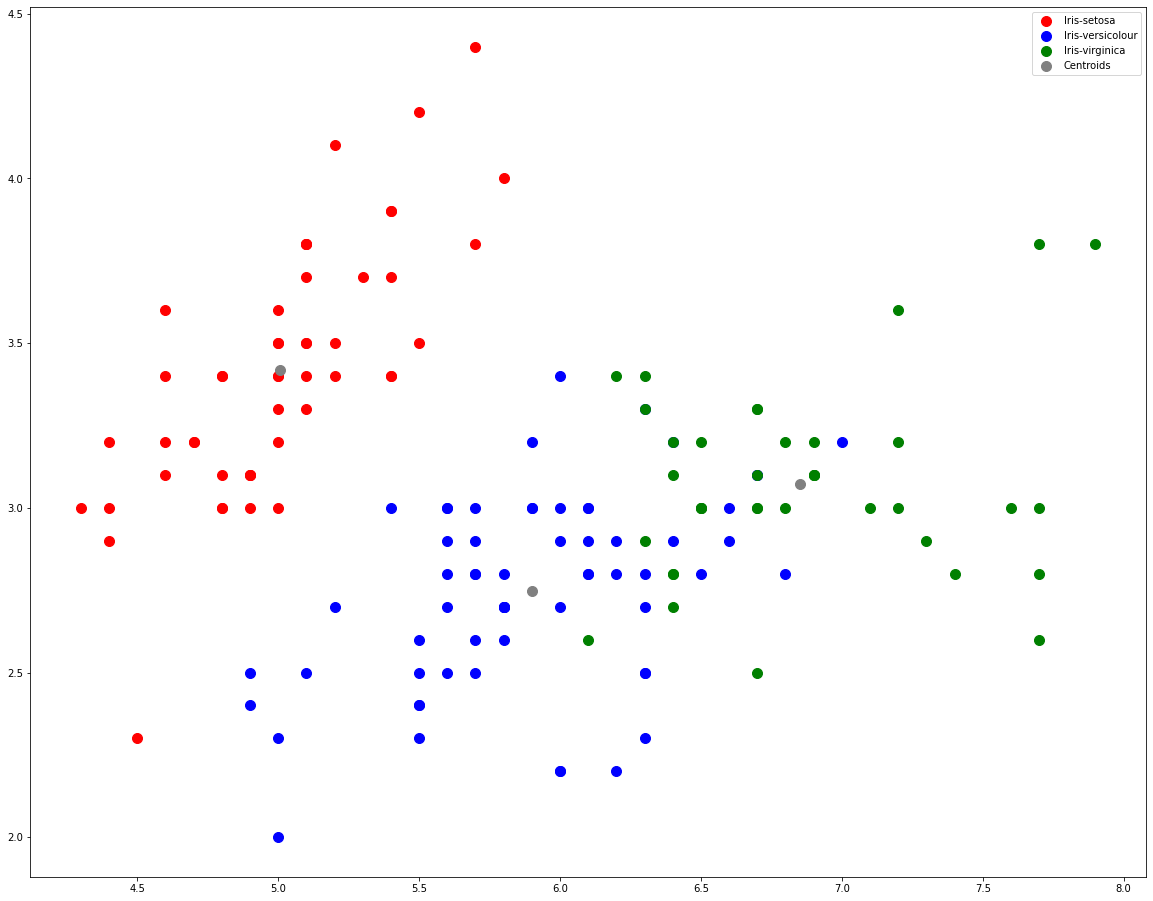

In [ ]:
fig,ax1 = plt.subplots(1,1,figsize = (20,16))

plt.scatter(data_new[model_f == 0].iloc[:,0], data_new[model_f == 0].iloc[:,1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_new[model_f == 1].iloc[:,0], data_new[model_f == 1].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_new[model_f == 2].iloc[:,0], data_new[model_f == 2].iloc[:,1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.show()